In [1]:
#We will first import the required libraries.

import cv2
import dlib
from time import time
import matplotlib.pyplot as plt

In [2]:
#Loading the HOG Face Detector
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

In [4]:
def hogDetectFaces(image, hog_face_detector, display = True):

    height, width, _ = image.shape

    output_image = image.copy()

    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    start = time()

    results = hog_face_detector(imgRGB, 0)

    end = time()

    for bbox in results:

        x1 = bbox.left()
        y1 = bbox.top()
        x2 = bbox.right()
        y2 = bbox.bottom()

        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)  

    if display:

        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)

        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');

    else:

        return output_image, results

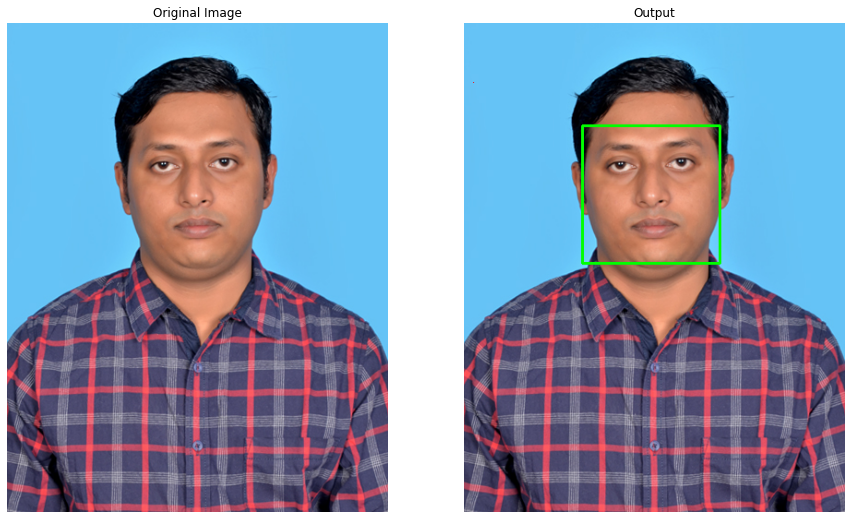

In [5]:
image = cv2.imread('2.jpg')
hogDetectFaces(image, hog_face_detector, display=True)

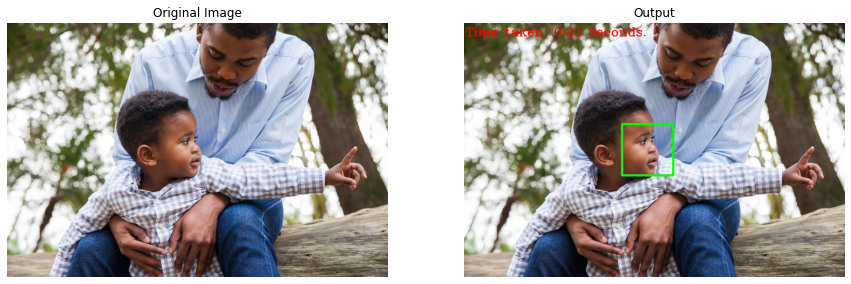

In [8]:
image = cv2.imread('/content/father.png')
hogDetectFaces(image, hog_face_detector, display=True)